<a href="https://colab.research.google.com/github/Aerospace87/ML-projects/blob/main/tensorflow/Cubic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model Example

In [ ]:
x = tf.linspace(0,1,10000)
x = tf.cast(x, tf.float32)

In [ ]:
def f(x):
  y = x**3 + x**2 + x + 1
  return y

y = f(x) + tf.random.normal([10000], mean = 0, stddev=1)

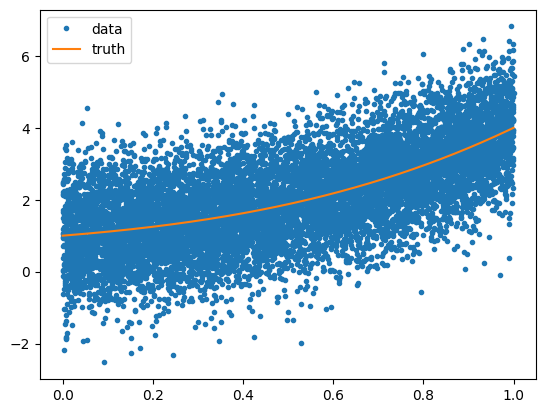

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x.numpy(), f(x).numpy(), label='truth')
plt.legend()

In [ ]:
class Model(tf.Module):

  def __init__(self):
    rand_int = tf.random.uniform(shape = [4], minval=0, maxval = 3, seed = 11)

    self.wc = tf.Variable(rand_int[0])
    self.wq = tf.Variable(rand_int[1])
    self.wl = tf.Variable(rand_int[2])
    self.b = tf.Variable(rand_int[3])


  def __call__(self, x):
    return self.wc * (x**3) + self.wq * (x**2) + self.wl * x + self.b


In [ ]:
my_model = Model()

In [ ]:
import matplotlib.pyplot as plt
def plot_preds(x, y, f, my_model):

  plt.plot(x.numpy(), y.numpy(), '.', label='data')
  plt.plot(x.numpy(), f.numpy(), label='truth')
  plt.plot(x, my_model, label='model')
  plt.legend()

In [ ]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
def normalize(y):
  std = tf.math.sqrt(tf.math.reduce_variance(y))
  mean = tf.math.reduce_mean(y)
  return (y - mean)/std, std, mean

In [ ]:
def denormalize(y,  std, mean):
  return (y * std) + mean

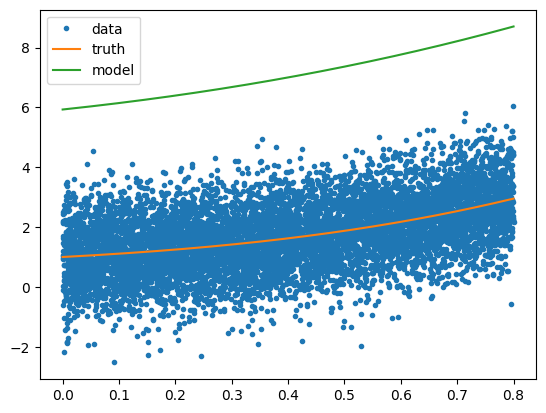

In [ ]:
batch_size = 100

samples_size = x.shape[0]
train_size = int(0.8*samples_size)
y, std, mean = normalize(y)

x_train, y_train = x[:train_size], y[:train_size]


x_val, y_val = x[train_size:], y[train_size:]

plot_preds(x_train, denormalize(y_train, std, mean), f(x_train), denormalize(my_model(x_train),std, mean))

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))


train_dataset = train_dataset.shuffle(buffer_size = x.shape[0]).batch(batch_size)


In [ ]:
epochs = 200
learning_rate = 0.05
train_losses = []
val_losses = []

for epoch in range(epochs):
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(my_model(x_batch), y_batch)

    grads = tape.gradient(batch_loss, my_model.variables)

    for g,v in zip(grads, my_model.variables):
      v.assign_sub(learning_rate * g)

  train_loss = mse_loss(my_model(x_batch), y_batch)
  train_losses.append(train_loss)

  val_loss = mse_loss(my_model(x_val), y_val)
  val_losses.append(val_loss)


  if epoch % 10 == 0:
    print(f"{epoch+1}/{epochs} TRAIN MSE: {train_loss}, VAL LOSS: {val_loss}")

1/200 TRAIN MSE: 0.6516933441162109, VAL LOSS: 0.5664628148078918
11/200 TRAIN MSE: 0.5347309708595276, VAL LOSS: 0.5595148801803589
21/200 TRAIN MSE: 0.6096107959747314, VAL LOSS: 0.5601325035095215
31/200 TRAIN MSE: 0.5975353121757507, VAL LOSS: 0.5579967498779297
41/200 TRAIN MSE: 0.47073036432266235, VAL LOSS: 0.5600336790084839
51/200 TRAIN MSE: 0.5407706499099731, VAL LOSS: 0.5581156015396118
61/200 TRAIN MSE: 0.5004869103431702, VAL LOSS: 0.5569568872451782
71/200 TRAIN MSE: 0.6726752519607544, VAL LOSS: 0.5579348206520081
81/200 TRAIN MSE: 0.6331643462181091, VAL LOSS: 0.5570490956306458
91/200 TRAIN MSE: 0.48571187257766724, VAL LOSS: 0.5582566261291504
101/200 TRAIN MSE: 0.5902236104011536, VAL LOSS: 0.5586358904838562
111/200 TRAIN MSE: 0.5725442171096802, VAL LOSS: 0.5573359131813049
121/200 TRAIN MSE: 0.7356183528900146, VAL LOSS: 0.556967556476593
131/200 TRAIN MSE: 0.7177369594573975, VAL LOSS: 0.5571021437644958
141/200 TRAIN MSE: 0.48620742559432983, VAL LOSS: 0.559092

KeyboardInterrupt: 

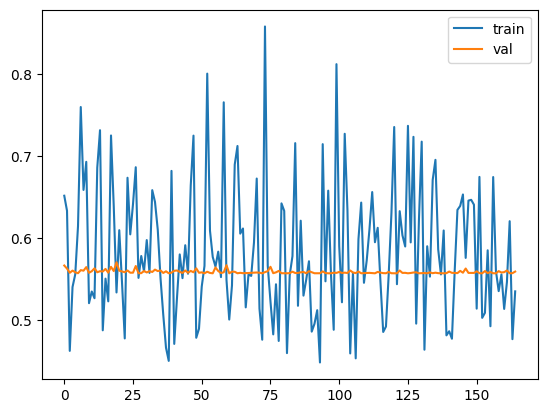

In [ ]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

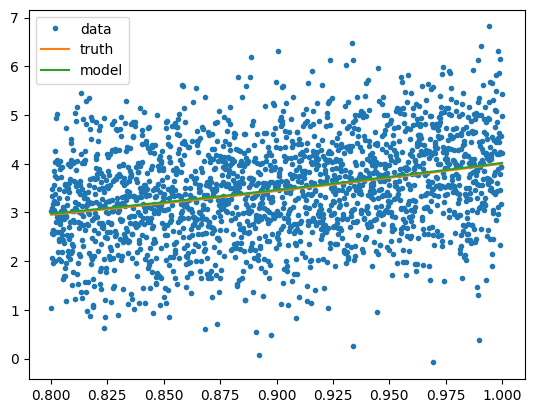

In [ ]:
plot_preds(x_val, denormalize(y_val, std, mean), f(x_val), denormalize(my_model(x_val),std, mean))

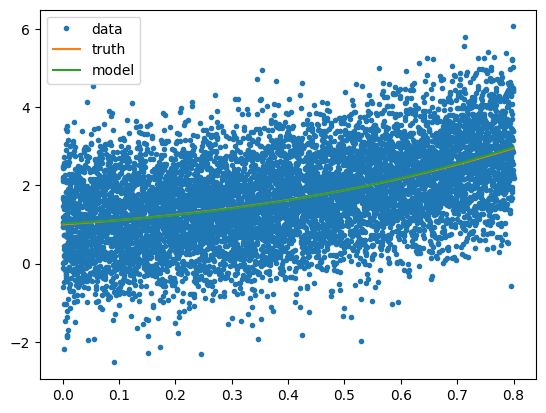

In [ ]:
plot_preds(x_train, denormalize(y_train, std, mean), f(x_train), denormalize(my_model(x_train),std, mean))

In [ ]:
my_model.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.7945365309715271>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5053102970123291>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5688406825065613>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.1881506443023682>)